# *nn.Module로 선형 회귀식 구현*

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
torch.manual_seed(1)

y = 2x를 가정한 상태에서 만들어진 데이터로 w = 2, b = 0임을 이미 알고 있는 상황<br>
<b>모델이 W, b 값을 제대로 찾아내도록 하는 것이 목표</b>

In [3]:
x_train = torch.Tensor([[1], [2], [3]])
y_train = torch.Tensor([[2], [4], [6]])

In [4]:
# 선형 회귀 모델
model = nn.Linear(1, 1) # input_dim, output_dim

# 

In [5]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


model에는 <b>model.parameters()</b> 함수에 가중치 W와 편향 b가 저장되어져 있음<br><br>
첫번째 값 : W, 두번째 값 : b<br>
두 값 모두 처음에는 랜덤 초기화가 되어있고, 학습 대상이므로 requires_grad=True로 설정되어 있음

In [6]:
# optimizer 설정. 경사 하강법 SGD를 사용하고 learning rate를 의미하는 lr은 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

In [7]:
# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # pytorch에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 연산
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


### *predict*

In [8]:
new_var = torch.Tensor([[4.0]])
pred_y = model(new_var)
print(f"훈련 후 입력이 4일 때의 예측값 : {pred_y}")

훈련 후 입력이 4일 때의 예측값 : tensor([[7.9989]], grad_fn=<AddmmBackward0>)


In [9]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.9994]], requires_grad=True), Parameter containing:
tensor([0.0014], requires_grad=True)]


# 

# *다중 선형 회귀 구현*

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [11]:
torch.manual_seed(1)

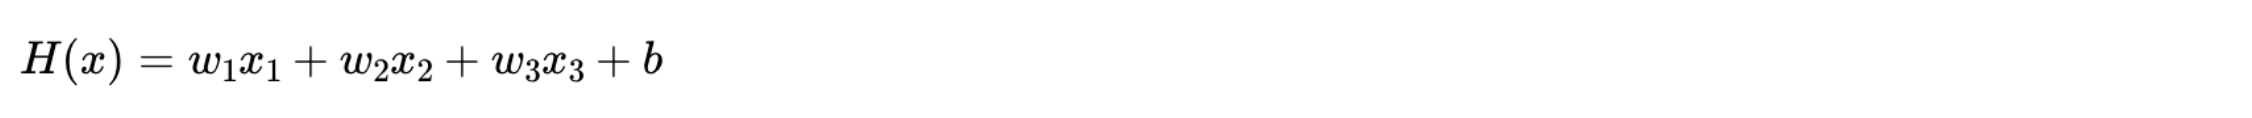

In [12]:
# data
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [15]:
model = nn.Linear(3, 1)

In [17]:
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True), Parameter containing:
tensor([0.2710], requires_grad=True)]


### *optimizer*

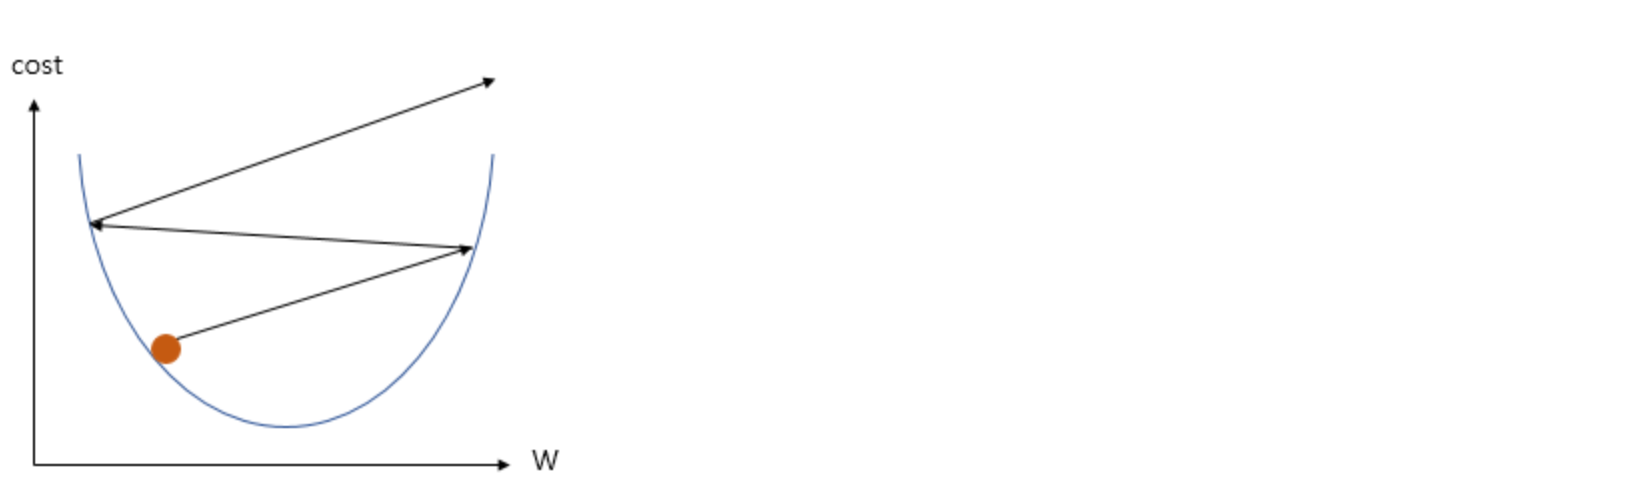
model.parameters()로 3개의 w, b를 전달<br>
학습률은 <u>0.00001(1e-5)</u>로 설정<br>
0.01로 하지 않는 이유는 <b>기울기가 발산</b>

In [19]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

### *train*

In [21]:
nb_epochs = 2000
for epoch in range(nb_epochs+1):
    # H(x) 계산
    pred = model(x_train)
    
    # cost 계산
    cost = F.mse_loss(pred, y_train) # pytorch에서 제공하는 평균 오차 제곱 함수
    
    # cost로 H(x) 계산
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분해서 gradient 계산
    cost.backward()
    # W, b 업데이트
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f"{epoch}/{nb_epochs}Epoch → {cost.item()}")

0/2000Epoch → 31667.59765625
100/2000Epoch → 0.2259877622127533
200/2000Epoch → 0.22390982508659363
300/2000Epoch → 0.22192999720573425
400/2000Epoch → 0.22005856037139893
500/2000Epoch → 0.21826967597007751
600/2000Epoch → 0.2165713608264923
700/2000Epoch → 0.21495532989501953
800/2000Epoch → 0.21341314911842346
900/2000Epoch → 0.2119491845369339
1000/2000Epoch → 0.2105575054883957
1100/2000Epoch → 0.20923714339733124
1200/2000Epoch → 0.20797093212604523
1300/2000Epoch → 0.20676425099372864
1400/2000Epoch → 0.2056158035993576
1500/2000Epoch → 0.20452742278575897
1600/2000Epoch → 0.20347893238067627
1700/2000Epoch → 0.2024870365858078
1800/2000Epoch → 0.20154185593128204
1900/2000Epoch → 0.2006380259990692
2000/2000Epoch → 0.19976894557476044


### *predict*

In [22]:
new_var = torch.Tensor([[73, 80, 75]])
pred_y = model(new_var)
print(f"예측값 : {pred_y}")

예측값 : tensor([[151.2305]], grad_fn=<AddmmBackward0>)


In [23]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.9778, 0.4539, 0.5768]], requires_grad=True), Parameter containing:
tensor([0.2802], requires_grad=True)]
